In [1]:
import pandas as pd
import numpy as np

Lets give each column a name, including `npn-(National Pokedex Number)`

In [2]:
cols= ['npn','name','t1','t2','total','hp','attack','defense','sp_atk','sp_def','speed']
data= pd.read_csv("Pokemon.csv", names= cols, skiprows=[0]) 
#the original name uses "#" for npn! Never use symbols as column names!

Let's add one more column of data- `Generation`. According to http://bulbapedia.bulbagarden.net/wiki/Regional_Pok%C3%A9dex -
- Generation I Pokémon: #001 Bulbasaur - #151 Mew
- Generation II Pokémon: #152 Chikorita - #251 Celebi
- Generation III Pokémon: #252 Treecko - #386 Deoxys
- Generation IV Pokémon: #387 Turtwig - #493 Arceus
- Generation V Pokémon: #494 Victini - #649 Genesect
- Generation VI Pokémon: #650 Chespin - #721 Volcanion

In [3]:
def generation(x):
    if x<152:
        return 1
    elif x>151 and x<252:
        return 2
    elif x>251 and x<387:
        return 3
    elif x>386 and x<494:
        return 4
    elif x>493 and x<650:
        return 5
    elif x>649 and x<722:
        return 6
    else:
        return 0
data['gen']= map(generation,data.npn)

In [4]:
data.gen.value_counts(normalize=True)

1    0.20750
5    0.20625
3    0.20000
4    0.15125
2    0.13250
6    0.10250
Name: gen, dtype: float64

In [5]:
for i in range(1,7):
    print "Name =",data.iloc[data[data['gen']==i].attack.idxmax(axis=1)]["name"]
    print "Total stats", data.iloc[data[data['gen']==i].attack.idxmax(axis=1)]["total"]
    print "Mean of total of generation" ,i, "is =",data[data['gen']==i]["attack"].mean()

Name = MewtwoMega Mewtwo X
Total stats 780
Mean of total of generation 1 is = 76.6385542169
Name = HeracrossMega Heracross
Total stats 600
Mean of total of generation 2 is = 72.0283018868
Name = GroudonPrimal Groudon
Total stats 770
Mean of total of generation 3 is = 81.625
Name = GarchompMega Garchomp
Total stats 700
Mean of total of generation 4 is = 82.867768595
Name = KyuremBlack Kyurem
Total stats 700
Mean of total of generation 5 is = 82.0666666667
Name = DiancieMega Diancie
Total stats 700
Mean of total of generation 6 is = 75.8048780488


Lets see if the legendary pokemon have different stats than others-
According to [Bulbapedia Legendary article](http://bulbapedia.bulbagarden.net/wiki/Legendary_Pok%C3%A9mon) -
> Of the 760 Pokémon species, 38 are Legendary Pokémon (5%). Each released generation has introduced at least three Legendary Pokémon
![legendary stats](https://raw.githubusercontent.com/chirag-jhamb/pokemon-analysis/master/img/legendary-stats.png)

Now lets see the average stats of the pokemon-

In [6]:
D=(data.describe().iloc[1,2:8])

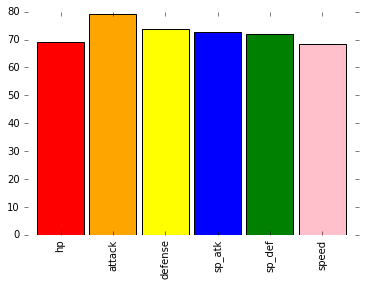

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
ax=D.plot(kind='bar',width = 0.9,color=['red','orange','yellow','blue','green','pink'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)


Obviously, legendary pokemons have different stats in the data, but since the dataset is too small, lets add a binary column `legendary` rather than removing these. True values would point to higher stats.
Lets use [List of legendary pokemon](http://bulbapedia.bulbagarden.net/wiki/Legendary_Pok%C3%A9mon#List_of_Legendary_Pok.C3.A9mon) to classify.

In [8]:
leg_npn=[144,145,146,150,243,244,245,249,250,377,378,379,380,381,382,383,384,386,385,480,481,482,483,484,485,486,487,491,492,493,494,638,639,640,641,642,643,644,645,646,716,717,718,719,720,721]
def func_legendary(x):
    if x in leg_npn:
        return True
    else:
        return False
data['legendary']= map(func_legendary,data.npn)